In [86]:
import numpy as np
import os

In [97]:
errs_folder = 'orbits/detections/'
cls_lonlat_folder = 'orbits/landmark_csvs/'
bad_classes_folder = 'bad_classes'

errs_files = os.listdir(errs_folder)
errs_files = [x for x in errs_files if x.endswith('errs.npy')]

In [88]:
regions = ['10S', '10T', '11R', '12R', '16T', '17R', '17T', '18S', 
                '32S', '32T', '33S', '33T', '52S', '53S', '54S', '54T']

In [89]:
def parse_err(err):
    xerr = float(err[1])
    yerr = float(err[2])
    cls = int(float(err[3]))
    region = err[4]
    conf = float(err[5])
    return region, cls, xerr, yerr, conf

In [90]:
region_errs = {}
for region in regions:
    region_errs[region] = []
orbit_num = 0
path_to_err = 'orbits/detections/' + str(orbit_num).zfill(5) + '_errs.npy'
errs = np.load(path_to_err)

for region in regions:
    region_errs[region] = []

for err_file in errs_files:
    errs = np.load(errs_folder + err_file)
    for err in errs:
        region, cls, xerr, yerr, conf = parse_err(err)
        region_errs[region].append([cls, xerr, yerr, conf])


In [74]:
orbit_num = 9
path_to_err = 'orbits/detections/' + str(orbit_num).zfill(5) + '_errs.npy'
errs = np.load(path_to_err)

regions = errs[:, 4]
errsleft = errs[:, :4]
errsright = errs[:, 5:]
errs_new = np.concatenate((errsleft, errsright), axis=1)
errs_new = errs_new.astype(float)
mean_x_errs = np.mean(errs_new[:, 1])
mean_y_errs = np.mean(errs_new[:, 2])
print(mean_x_errs, mean_y_errs)


8.263912063972535 9.617192798176742


In [98]:
times_to_first_detection = []
for err_file in errs_files:
    errs = np.load(errs_folder + err_file)
    if len(errs) == 0:
        continue
    times_to_first_detection.append(errs[0,0])
times_to_first_detection = np.array(times_to_first_detection).astype(float)
print(np.mean(times_to_first_detection))

3802.0397111913358


In [75]:
errors_per_class_per_region = {}
for region, errors in region_errs.items():
    errors_per_class_per_region[region] = {}
    for error in errors:
        cls = int(error[0])
        conf = float(error[3])
        if conf >= 0.8:
            if cls not in errors_per_class_per_region[region]:
                errors_per_class_per_region[region][cls] = []
            errors_per_class_per_region[region][cls].append(error[1:])

mean_errors_by_class_region = {}
median_errors_by_class_region = {}

for region, errors in errors_per_class_per_region.items():
    mean_errors_by_class_region[region] = {}
    median_errors_by_class_region[region] = {}
    
    for cls, cls_errors in errors.items():
        cls_errors = np.array(cls_errors)
        mean_errors = np.mean(cls_errors[:, :2], axis=0)
        median_errors = np.median(cls_errors[:, :2], axis=0)
        
        mean_errors_by_class_region[region][cls] = mean_errors
        median_errors_by_class_region[region][cls] = median_errors

print("Mean errors by class and region:")
print(mean_errors_by_class_region)
print("\nMedian errors by class and region:")
print(median_errors_by_class_region)


Mean errors by class and region:
{'10S': {210: array([4.61089472, 3.65624425]), 376: array([14.8079846 , 19.48823171]), 415: array([10.67522689,  8.10842745]), 62: array([2.88369926, 1.72056698]), 86: array([1.76380427, 1.57075161]), 423: array([ 4.48443777, 14.61181894]), 324: array([4.6793156, 7.8468199]), 180: array([3.45802849, 2.79549884]), 335: array([4.49623173, 7.37334781]), 274: array([5.83273561, 6.36044384]), 64: array([ 7.34109534, 20.97709975]), 238: array([3.68398518, 2.85492594]), 225: array([4.63410052, 7.63353483]), 45: array([2.25115517, 2.49225146]), 395: array([ 8.33278902, 13.29296559]), 39: array([3.92202822, 2.0603286 ]), 381: array([4.42679785, 8.16803322]), 30: array([1.63172962, 2.7088347 ]), 403: array([17.20992016, 15.05221787]), 37: array([5.0546409 , 7.57772255]), 235: array([4.95835369, 7.29309548]), 179: array([3.530419  , 1.87269098]), 125: array([2.15642924, 2.1122031 ]), 211: array([4.860012  , 4.83973138]), 106: array([2.0156023 , 1.92457306]), 339: 

In [76]:
mean_norm_errors_per_class = {}
median_norm_errors_per_class = {}
max_norm_errors_per_class = {}  # Add this line

for region, errors_per_class in errors_per_class_per_region.items():
    mean_norm_errors_per_class[region] = {}
    median_norm_errors_per_class[region] = {}
    max_norm_errors_per_class[region] = {}  # Add this line
    
    for cls, errors in errors_per_class.items():
        norm_errors = np.linalg.norm(errors, axis=1)
        mean_norm_error = np.mean(norm_errors)
        median_norm_error = np.median(norm_errors)
        max_norm_error = np.max(norm_errors)  # Add this line
        
        mean_norm_errors_per_class[region][cls] = mean_norm_error
        median_norm_errors_per_class[region][cls] = median_norm_error
        max_norm_errors_per_class[region][cls] = max_norm_error  # Add this line


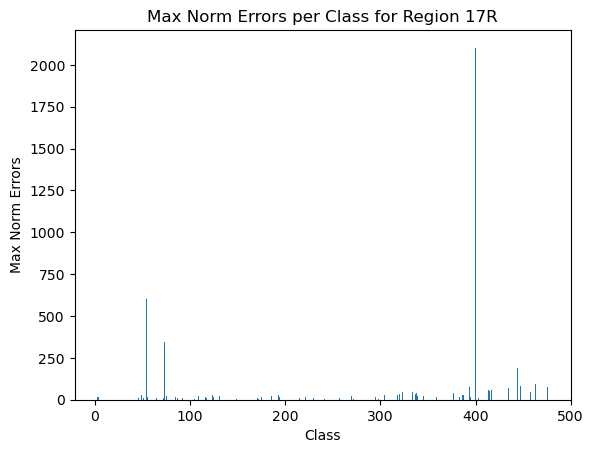

In [77]:
import matplotlib.pyplot as plt
region = '17R'

# Get the max_norm_errors_per_class for region 10T
max_norm_errors_10T = max_norm_errors_per_class.get(region, {})

# Extract the classes and errors
classes = list(max_norm_errors_10T.keys())
errors = list(max_norm_errors_10T.values())

# Plot the max_norm_errors_per_class
plt.bar(classes, errors)
plt.xlabel('Class')
plt.ylabel('Max Norm Errors')
plt.title('Max Norm Errors per Class for Region ' + region)
plt.show()


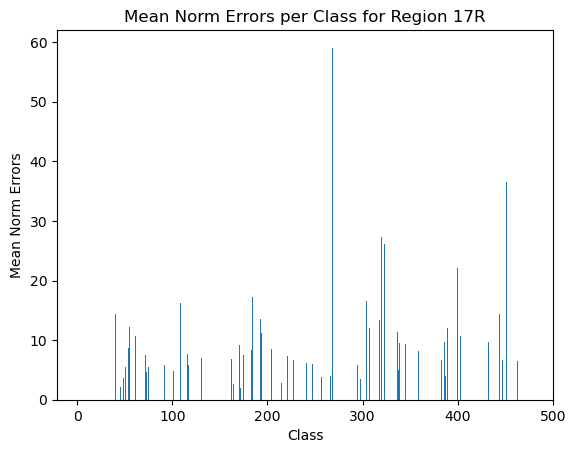

In [83]:
import matplotlib.pyplot as plt
region = '17R'



# Get the mean_norm_errors_per_class for region 10T
mean_norm_errors_10T = mean_norm_errors_per_class.get(region, {})

# Extract the classes and errors
classes = list(mean_norm_errors_10T.keys())
errors = list(mean_norm_errors_10T.values())

# Plot the mean_norm_errors_per_class
plt.bar(classes, errors)
plt.xlabel('Class')
plt.ylabel('Mean Norm Errors')
plt.title('Mean Norm Errors per Class for Region ' + region)
plt.show()


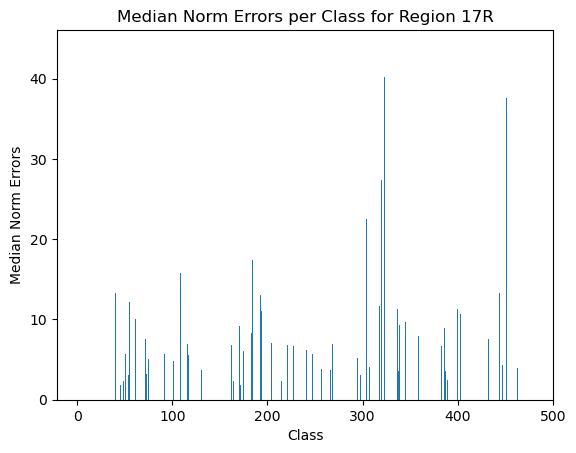

In [84]:
import matplotlib.pyplot as plt
region = '17R'

# Get the median norm errors per class for region 10T
median_norm_errors_10T = median_norm_errors_per_class.get(region, {})

# Extract the classes and errors
classes = list(median_norm_errors_10T.keys())
errors = list(median_norm_errors_10T.values())

# Plot the mean_norm_errors_per_class
plt.bar(classes, errors)
plt.xlabel('Class')
plt.ylabel('Median Norm Errors')
plt.title('Median Norm Errors per Class for Region ' + region)
plt.show()


In [85]:
import numpy as np

# Define the threshold
threshold = 25
max_threshold = 200

# Initialize an empty numpy array to store the results
results = np.empty((0, 3), dtype=object)

bad_classes_dict = {}

for region in regions:
    bad_class_list = []
    for cls, values in mean_norm_errors_per_class[region].items():
        if values > threshold:
            bad_class_list.append(cls)
    for cls, values in median_norm_errors_per_class[region].items():
        if values > threshold:
            bad_class_list.append(cls)
    for cls, values in max_norm_errors_per_class[region].items():
        if values > max_threshold:
            bad_class_list.append
    bad_classes_dict[region] = np.unique(bad_class_list)

print(bad_classes_dict)


{'33T': array([ 46, 137, 228, 345, 364, 440]), '33S': array([ 43, 300, 327, 355, 385, 424, 486])}


In [81]:
for region in regions:
    if os.path.exists(bad_classes_folder + '/' + region + '_bad_classes.npy'):
        bad_classes = np.load(bad_classes_folder + '/' + region + '_bad_classes.npy')
    else:
        bad_classes = np.array([], dtype=int)
    for cls in bad_classes_dict[region]:
        if cls not in bad_classes:
            bad_classes = np.append(bad_classes, cls)
            print('new_bad_class:' , region, cls)
    np.save(bad_classes_folder + '/' + region + '_bad_classes.npy', bad_classes)